In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Preoperative 데이터 설명
* Patient Initials: 환자명 <br>
* Age : 나이 <br>
* Menopause: 폐경 ('월경이 중지 되는 것'을 의미) yes: 중지, no: 진행 <br>
* Method: 수술법을 의미. <br>
'Dilatation/currettage': 자궁긁어냄술(dilatation and curettage(D&C)) - 자궁 경부를 통해 자궁 내막을 큐렛 등의 기구로 긁어내는 수술 <br>
'Hysteroscopy': 자궁경(Hysteroscopy): 질 쪽으로 접근하여, 배에 절개 부위 없이 자궁내강을 확인하는 내시경<br>
'Pipelle biopsy': 파이프 생검.(자궁 내막의 조직을 떼어내서 검사하는 방법?) <br>
* Histologic type:  <br>
'Endometrioid': 자궁내막암 <br>
* Grade: cell type <br>
'l': 일반적인 세포로 보이면서 빠르게 성장 하지 않는 암세포 <br>
'll': 일반적인 세포로 보이지 않으면서 일반 세포보다 빠르게 자라는 암세포 <br>
* CA125(IU/ml): 고분자 당단백으로 흔히 난소암 및 자궁내막암 등의 부인과계 종양에서 증가하는 종양표지자(tumor marker) - 나중에 분포도 확인.
* Myometrial invasion depth: 미토콘드리아 침습 깊이 <br>
'Less than 50% (< 1/2)' <br>
'None' <br>
* Tumor size (largest diameter): 종양 크기 <br>

# Postoperative 데이터 설명
* Route: 수술 경로 <br>
'Laparoscopic': 복강경 수술은 환자의 생체에 미치는 상해나 영향을 줄인 ‘최소 침습 수술’ 방법의 하나로서, 복부나 흉부를 절개하는 대신 0.5~1.5cm 크기의 작은 구멍을 뚫고 특수 카메라가 장착된 내시경(복강경)을 집어넣어 복강 내를 보면서 수술 도구(겸자, 전기메스, 지혈 봉합기구 등)로 수술하는 방식이다. <br>
'Open(abdominal)': 복부를 열어서 하는 수술로 보임.
'Robotic': 로봇을 이용한 수술로보임.
* Stage(region): 암의 영역 크기를 말하는 것 같음. 크기에 따라 1A~1B까지 분류 <br>
'la', 'll', 'lllc', 'lb', 'lllc1'이 있음. <br>
* Histologic diagnosis : 조직학적 진단<br>
'Endometrioid' : 자궁내막암 <br>
'Squamous or adenosquamous': 편평세포암은 피부, 입술, 입, 식도, 방광, 전립선, 폐, 질, 및 자궁 경부 등 중층편평상피를 가진 부위에 발병하는 악성 종양으로 피부에 가장 흔하게 발생. <br>
'Mixed?(with endometrioid)': 자궁내막암과 섞인 것을 말하는 것으로 보임.
* Grade: Cell type를 말함. <br>
'I', 'II', 'III', 'Inadequate for interpretation'를 가짐. 우리가 봐야할 것은 I, II
* Myometrial invassion depth: 미토콘드리아 침습 깊이 <br>
'Less than 50%', 'None', 'More than 50%'를 가짐.<br>
* Tumor size(largest diameter): 종양 크기<br>
여기에서는 float 값으로 가짐. <br>
* Extrauterine involvement: 자궁외 질환 <br>
'Cervix' : 자궁경부. 질에서 부터 자궁으로 향하는 좁은 부분의 자궁을 자궁경부라고 합니다.<br>
기능 <br>
자궁경부는 임신과 출산에 있어서 중요한 기능. <br>
자궁경부는 바이러스나 박테리아와 같은 세균을 막아 자궁을 감염으로부터 막아주는 역할을 하는데, 특히 임신시에는 외부로부터 태아를 보호하는 기능 외에 태아의 성장에 따라 무거워지는 자궁을 받치는 역할까지 하게 됩니다. <br>
'none' : 없음.
* Lymphovascular space invasion (LVSI):림프관 공간 침입 <br>
'No', 'Yes', 'yes'를 가짐. <br>
* Metastasis of pelvic lymph node: 골반 림프절 전이<br>
'0', 'yes'를 가짐.
* Metastasis of para-aortic lymph node: 준대동맥 림프절 전이. 파라 대동맥 림프절으로의 전이는 다변량 분석에서 사망률과 유의한 연관성을 가진 단일 독립 인자였다. <br>
https://pubmed.ncbi.nlm.nih.gov/17171496/ <br>
'0' 밖에 안가짐. <br>
* LN metastasis: LN 전이. 림프절 전이(LNM)는 두경부암(HNC)의 중요한 예후인자로, 재발과 나쁜 결과를 초래한다.<br>
'no', 'yes'를 가짐.

# Preoperative 데이터

In [2]:
# Preoperative 데이터
data = pd.read_csv('train.csv')
data.head()

Patient Initials  Age Menopause  Unnamed: 3                 Method  \
0             LMQI   54       Yes         NaN  Dilatation/currettage   
1             ZJYU   55       Yes         NaN  Dilatation/currettage   
2             YGFA   45        No         NaN  Dilatation/currettage   
3             YYHI   62       Yes         NaN  Dilatation/currettage   
4             CJQI   55       Yes         NaN  Dilatation/currettage   

  Histologic type Grade  Unnamed: 7  CA125 (IU/ml) Myometrial invasion depth  \
0    Endometrioid     I         NaN          14.94     Less than 50% (< 1/2)   
1    Endometrioid     I         NaN          20.38                      None   
2    Endometrioid     I         NaN          43.47     Less than 50% (< 1/2)   
3    Endometrioid     I         NaN          13.83     Less than 50% (< 1/2)   
4    Endometrioid     I         NaN           9.02     Less than 50% (< 1/2)   

  Tumor size (largest diameter)  
0                             3  
1                           1.7  
2                          1.25  
3                           4.7  
4                           1.3

## 이상한 Column 제거

In [3]:
# 이상한 column 제거
data.drop(['Unnamed: 3','Unnamed: 7','Patient Initials', 'Histologic type'], axis=1, inplace=True)

* Patient Initials는 환자 명이라서 지움. <br>
* Histologic type: 자궁내막암. (한가지 type만 있어서 지움.)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            252 non-null    int64  
 1   Menopause                      252 non-null    object 
 2   Method                         252 non-null    object 
 3   Grade                          252 non-null    object 
 4   CA125 (IU/ml)                  251 non-null    float64
 5   Myometrial invasion depth      252 non-null    object 
 6   Tumor size (largest diameter)  252 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.9+ KB


# Postoperative 데이터

In [5]:
# PostOperative 데이터
label_data = pd.read_csv('label.csv')
label_data.head()

label_data.drop(['Unnamed: 7'], axis=1, inplace=True)

In [6]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Route                                 252 non-null    object 
 1   Stage                                 252 non-null    object 
 2   Histologic diagnosis                  252 non-null    object 
 3   Grade                                 252 non-null    object 
 4   Myometrial invasion depth             252 non-null    object 
 5   Tumor size (largest diameter)         252 non-null    float64
 6   Extrauterine involvement              252 non-null    object 
 7   Lymphovascular space invasion (LVSI)  252 non-null    object 
 8   Metastasis of pelvic lymph node       252 non-null    object 
 9   Metastasis of para-aortic lymph node  252 non-null    int64  
 10  LN metastasis                         252 non-null    object 
dtypes: float64(1), int6

## 1. Grade columns

In [7]:
label_data['Grade'].unique()

array(['I', 'II', 'III', 'Inadequate for interpretation',
       '                                                                                                                                                         '],
      dtype=object)

In [8]:
label_data['Grade'] = label_data['Grade'].replace('III', 'others')
label_data['Grade'] = label_data['Grade'].replace('Inadequate for interpretation', 'others')
label_data['Grade'] = label_data['Grade'].replace('                                                                                                                                                         ', 'others')

* Grade I와 II, others로 3개로 구분함.
* Others는 III, 해석하기 부적절한 값, 빈칸

In [9]:
label_Grade = label_data['Grade']
label_Grade.unique()

array(['I', 'II', 'others'], dtype=object)

* label_Grade에 저장

## 2. Stage columns

In [10]:
label_data['Stage'].unique()

array(['Ia', 'II', 'IIIc', 'Ib', 'IIIc1'], dtype=object)

In [11]:
label_data['Stage'] = label_data['Stage'].replace('II', 'Ia')
label_data['Stage'] = label_data['Stage'].replace('IIIc', 'Ia')
label_data['Stage'] = label_data['Stage'].replace('IIIc1', 'Ia')

* Postoperative에서 Stage와 침습 깊이(Myometrial invasion depth)를 확인해보니, 
* 'More than 50%'인 경우만 lb이었고, 나머지는 'la', 'II', 'IIIc', 'IIIc1'이었다.
* 그래서 나머지들을 la로 통합시킴.

In [12]:
label_Stage = label_data['Stage']
label_Stage.unique()

array(['Ia', 'Ib'], dtype=object)

# 3. Postoperative에서의 Group 나누기.
암수술전에 시행한 자궁내막조직검사 및 MRI에 따라 <br> 
Group 1 (no myometrial invasion + grade 1),  <br>
Group 2 (no myometrial invasion + grade 2),  <br>
Group 3 (Myometrial invasion<50% + grade 1),  <br>
Group 4 (Myometrial invasion<50% + grade 2)로  <br>
분류한 후 각각의 group에 속한 환자들이 암수술 후에도 여전히 같은 group에 있을 가능성을 평가함(accuracy, NPV, PPV, sensitivity, specificity, AUC, Kappa) => total population에서도 시행함

In [13]:
Group_A = ((label_data['Grade']== 'I') & (label_data['Myometrial invasion depth']=='None'))
Group_A.value_counts()

False    184
True      68
dtype: int64

In [14]:
Group_B = ((label_data['Grade']== 'I') & (label_data['Myometrial invasion depth']=='Less than 50%'))
Group_B.value_counts()

False    150
True     102
dtype: int64

In [15]:
Group_C = ((label_data['Grade']== 'II') & (label_data['Myometrial invasion depth']=='None'))
Group_C.value_counts()

False    236
True      16
dtype: int64

In [16]:
Group_D = ((label_data['Grade']== 'II') & (label_data['Myometrial invasion depth']=='Less than 50%'))
Group_D.value_counts()

False    210
True      42
dtype: int64

## 즉, 
Group A: 68 <br> 
Group B: 102 <br> 
Group C: 16 <br> 
Group D: 42 <br> 
전체 환자 수 : 252명, Group A~D: 228, 나머지: 24(Grade='others' 이거나 침습깊이가 More than 50%일 때)

# 4. Preoperative의 침습 깊이와 Postoperative의 침습깊이 예측 비교

In [17]:
data['Myometrial invasion depth'].unique()

array(['Less than 50% (< 1/2)', 'None'], dtype=object)

In [18]:
label_data['Myometrial invasion depth'].unique()

array(['Less than 50%', 'None', 'More than 50%'], dtype=object)

In [19]:
none = ((data['Myometrial invasion depth'] == 'None') & (label_data['Myometrial invasion depth'] == 'None'))
none.value_counts()
 # None -> None: 71

False    181
True      71
Name: Myometrial invasion depth, dtype: int64

In [20]:
lnone = ((data['Myometrial invasion depth'] == 'None') & (label_data['Myometrial invasion depth'] == 'Less than 50%'))
lnone.value_counts()
# None -> Less than 50%: 72

False    180
True      72
Name: Myometrial invasion depth, dtype: int64

In [21]:
mnone = ((data['Myometrial invasion depth'] == 'None') & (label_data['Myometrial invasion depth'] == 'More than 50%'))
mnone.value_counts()
# None -> More than 50%: 4

False    248
True       4
Name: Myometrial invasion depth, dtype: int64

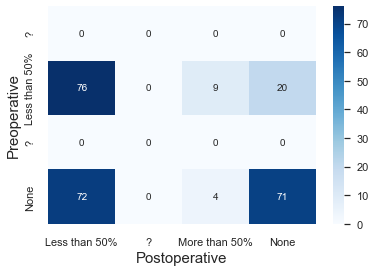

In [22]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
# Confusion matrix 확인.
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=11)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=11)  # y축 눈금 폰트 크기

cf_matrix = confusion_matrix(data['Myometrial invasion depth'], label_data['Myometrial invasion depth'])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('Postoperative')
ax.set_ylabel('Preoperative')

ax.xaxis.set_ticklabels(['Less than 50%', '?', 'More than 50%', 'None'])
ax.yaxis.set_ticklabels(['?', 'Less than 50%', '?', 'None'])

plt.show()

Preoperative -> Postoperative
* None -> None: 71 (28.17%)
* None -> Less than 50%: 72 (28.5%)
* None -> More than 50%: 4 (1.58%)<br> <br>

* Less than 50% -> None: 20 (7.93%)
* Less than 50% -> Less than 50%: 76 (30.15%)
* Less than 50% -> More than 50%: 9 (3.57%) <br><br>
* 심하게 잘못 예측한 경우(Postoperative가 More than 50%)는 총 13개 정도. 전체의 약 5.15%
* 그나마 괜찮은 경우: 94.84% (Postoperative가 Less than 50%이하인 경우)
* 어차피 Postoperative가 Less than 50% 이하인 경우에는 Stage 1A이므로 오차율 약 5%을 제외하고는 괜찮다고 봄.

# 5. Preoperative의 Grade와 Postoperative의 Grade 비교

In [23]:
data['Grade'].unique()

array(['I', 'II'], dtype=object)

In [24]:
label_data['Grade'].unique()

array(['I', 'II', 'others'], dtype=object)

In [25]:
none = ((data['Grade'] == 'I') & (label_data['Grade'] == 'I'))
none.value_counts()
 # I -> I: 71

True     152
False    100
Name: Grade, dtype: int64

In [26]:
none = ((data['Grade'] == 'I') & (label_data['Grade'] == 'II'))
none.value_counts()
 # I -> II: 71

False    228
True      24
Name: Grade, dtype: int64

In [27]:
none = ((data['Grade'] == 'I') & (label_data['Grade'] == 'others'))
none.value_counts()
 # I -> II: 71

False    247
True       5
Name: Grade, dtype: int64

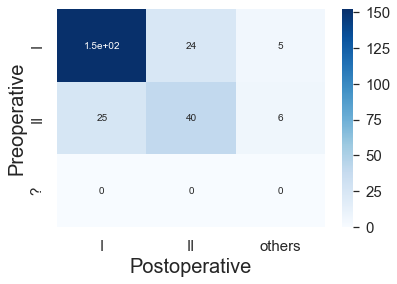

In [28]:
# Confusion matrix 확인.
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기

cf_matrix = confusion_matrix(data['Grade'], label_data['Grade'])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('Postoperative')
ax.set_ylabel('Preoperative')

ax.xaxis.set_ticklabels(['I', 'II', 'others'])
ax.yaxis.set_ticklabels(['I', 'II', '?'])

plt.show()

Preoperative -> Postoperative
* I -> I: 152 (60.31%)
* I -> II: 24 (9.52%)
* I -> others: 5 (1.98%)<br> <br>

* II -> I: 25 (9.92%)
* II -> II: 40 (15.87%)
* II -> others: 6 (2.38%)<br><br>
* 'l': 일반적인 세포로 보이면서 빠르게 성장 하지 않는 암세포
* 'll': 일반적인 세포로 보이지 않으면서 일반 세포보다 빠르게 자라는 암세포 <br><br>

* Grade 또한 정확하게 예측하는 것이 좋겠지만, II단계까지 호르몬 치료를 하려고 Group을 나눴기 때문에 II 이하까지는 괜찮다고 가정한다. 
* 그러면 others로 결론이 난 것이 문제인데, 총 11개로 약 4.36% 오류를 가지고 있다.
* *others는 III, 해석하기 부적절한 값, 빈칸

In [29]:
cf_matrix = confusion_matrix(data['Grade'], label_data['Grade'])
cf_matrix

array([[152,  24,   5],
       [ 25,  40,   6],
       [  0,   0,   0]], dtype=int64)

# 데이터 전처리(분석)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            252 non-null    int64  
 1   Menopause                      252 non-null    object 
 2   Method                         252 non-null    object 
 3   Grade                          252 non-null    object 
 4   CA125 (IU/ml)                  251 non-null    float64
 5   Myometrial invasion depth      252 non-null    object 
 6   Tumor size (largest diameter)  252 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.9+ KB


## 종양 크기의 Dtypes를 float로 변환

In [31]:
data['Tumor size (largest diameter)'].unique()

array(['3', '1.7', '1.25', '4.7', '1.3', '2.3', '5.5', '0.6', '2', '.',
       '3.7', '4.2', '1.5', '2.9', '2.2', '3.3', '5', '2.8', '0', '2.5',
       '1.8', '5.8', '0.1', '4', '1', '2.6', '7.58', '3.4', '2.1', '3.5',
       '1.2', '1.1', '4.5', '3.6', '0.9', '5.7', '3.1', '2.7', '0.8',
       '2.4', '4.1', '1.6', '1.9', '8.3', '3.2', '4.4', '1.45', '17',
       '3.9', '0.5'], dtype=object)

In [32]:
# '.' 형태를 0으로 변환.
data['Tumor size (largest diameter)'].replace('.', 0, inplace=True)

In [33]:
data['Tumor size (largest diameter)'] = data['Tumor size (largest diameter)'].astype('float')

* unique()를 통해 값들을 확인해보니 float 수치형으로 되어 있는 것으로 판단이 되어 float형으로 변환을 했다.
* 여기에서 '.' 가 있는데, 이는 0으로 처리를 변환을 했다. (.은 모르거나 측정이 안됐다고 판단이 되어 종양크기가 0으로 가정을 함.)

## 범주형, 수치형 column 구분

In [34]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O']
num_columns = [c for c in data.columns if c not in cat_columns]

print('Categorical columns: \n {}\n\n Numeric columns: \n{}\n'.format(cat_columns, num_columns))

Categorical columns: 
 ['Menopause', 'Method', 'Grade', 'Myometrial invasion depth']

 Numeric columns: 
['Age', 'CA125 (IU/ml)', 'Tumor size (largest diameter)']



In [35]:
Categorical = data.select_dtypes(include=['object'])
Numerical = data.select_dtypes(include=['int64', 'float64'])
print('Categorical feature:\n', Categorical)
print('Numerical features:\n', Numerical)

Categorical feature:
     Menopause                 Method Grade Myometrial invasion depth
0         Yes  Dilatation/currettage     I     Less than 50% (< 1/2)
1         Yes  Dilatation/currettage     I                      None
2          No  Dilatation/currettage     I     Less than 50% (< 1/2)
3         Yes  Dilatation/currettage     I     Less than 50% (< 1/2)
4         Yes  Dilatation/currettage     I     Less than 50% (< 1/2)
..        ...                    ...   ...                       ...
247        No         Pipelle biopsy     I     Less than 50% (< 1/2)
248        No         Pipelle biopsy     I     Less than 50% (< 1/2)
249        No         Pipelle biopsy    II                      None
250       Yes         Pipelle biopsy    II     Less than 50% (< 1/2)
251        No         Pipelle biopsy    II     Less than 50% (< 1/2)

[252 rows x 4 columns]
Numerical features:
      Age  CA125 (IU/ml)  Tumor size (largest diameter)
0     54          14.94                           

# 1. Grade
# Grade의 분포도 확인

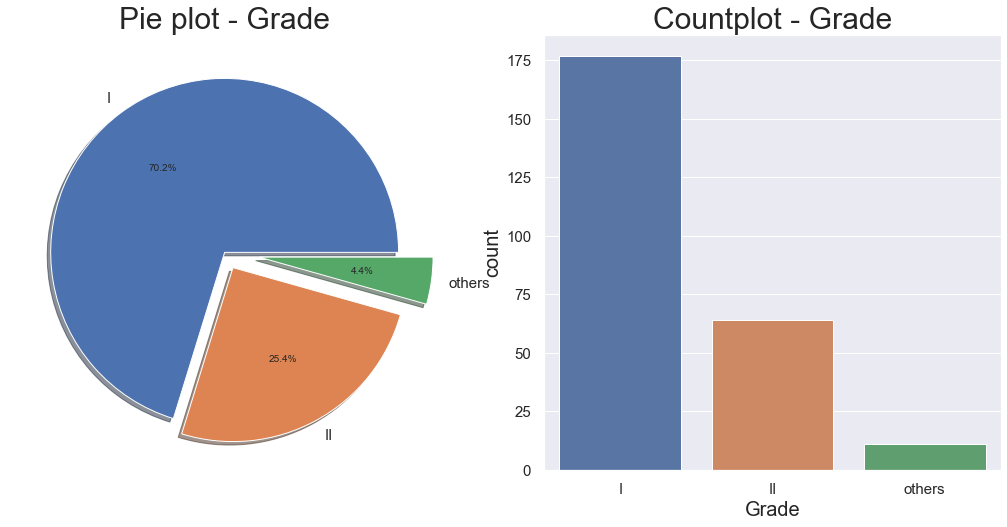

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

label_data['Grade'].value_counts().plot.pie(explode=[0, 0.1, 0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Grade')
ax[0].set_ylabel('')
sns.countplot('Grade', data=label_data, ax=ax[1])
ax[1].set_title('Countplot - Grade')

plt.show()

* Postoperative의 Grade를 확인했다.
* others는 III or 해석불가능한 값 or 빈칸.
* I와 II의 분포는 나름 균일하다.

# heatmap

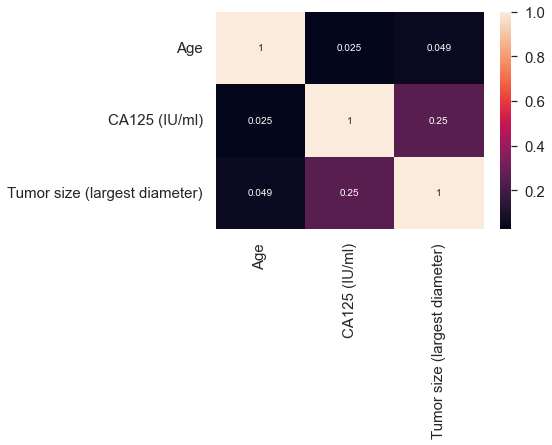

In [37]:
sns.heatmap(data.corr(), annot=True)
plt.show()

* CA125와 Tumor size가 연관성이 그나마 있었다.

# distribution plot of CA125 for Grade

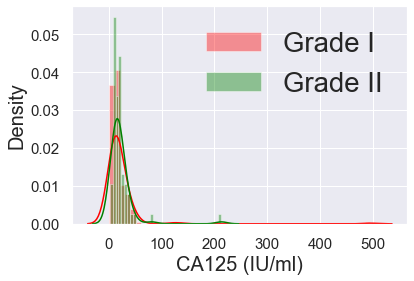

In [38]:
sns.distplot(data['CA125 (IU/ml)'][data['Grade']=='I'], kde=True, color='red', label='Grade I')
sns.distplot(data['CA125 (IU/ml)'][data['Grade']=='II'], kde=True, color='green', label='Grade II')
plt.legend()

* 한쪽으로 편향되어 있다. (비대칭)
* 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습될 수 있으므로 몇개 없는 outlier에 대해서 너무 민감하게 반응한다면, 실제 예측시에 좋지 못한 결과를 부를 수 있다.
* outlier의 영향을 줄이기 위해 'CA125 (IU/ml)에 log를 취한다.

In [39]:
data['CA125 (IU/ml)'] = data['CA125 (IU/ml)'].map(lambda i: np.log(i) if i>0 else 0)

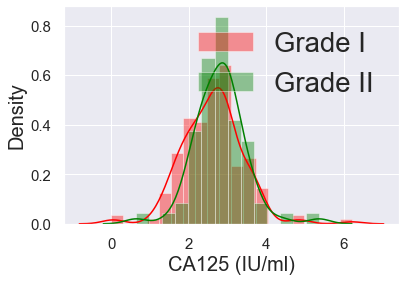

In [40]:
sns.distplot(data['CA125 (IU/ml)'][data['Grade']=='I'], kde=True, color='red', label='Grade I')
sns.distplot(data['CA125 (IU/ml)'][data['Grade']=='II'], kde=True, color='green', label='Grade II')
plt.legend()

* CA125가 좀 더 큰 중간 지점에는 Grade II가 더 분포되어 있고
* CA125가 좀 더 작은 지점에는 Grade I이 더 분포되어 있다.

# distribution plot of Tumor size for Grade

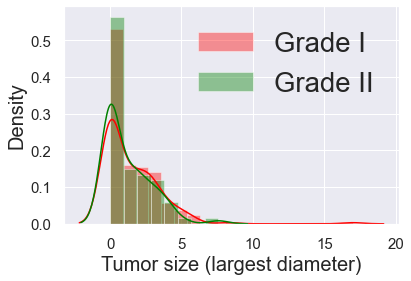

In [41]:
sns.distplot(data['Tumor size (largest diameter)'][data['Grade']=='I'], kde=True, color='red', label='Grade I')
sns.distplot(data['Tumor size (largest diameter)'][data['Grade']=='II'], kde=True, color='green', label='Grade II')
plt.legend()

In [42]:
data['Tumor size (largest diameter)'] = data['CA125 (IU/ml)'].map(lambda i: np.log(i) if i>0 else 0)

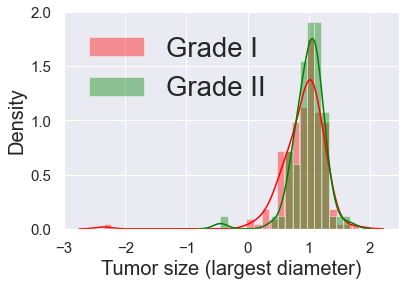

In [43]:
sns.distplot(data['Tumor size (largest diameter)'][data['Grade']=='I'], kde=True, color='red', label='Grade I')
sns.distplot(data['Tumor size (largest diameter)'][data['Grade']=='II'], kde=True, color='green', label='Grade II')
plt.legend()

# 수치형, 범주형 countplot

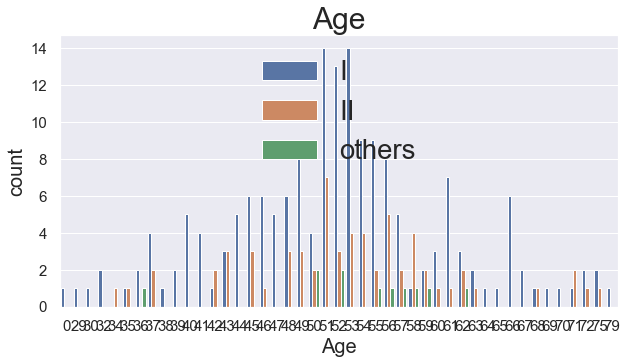

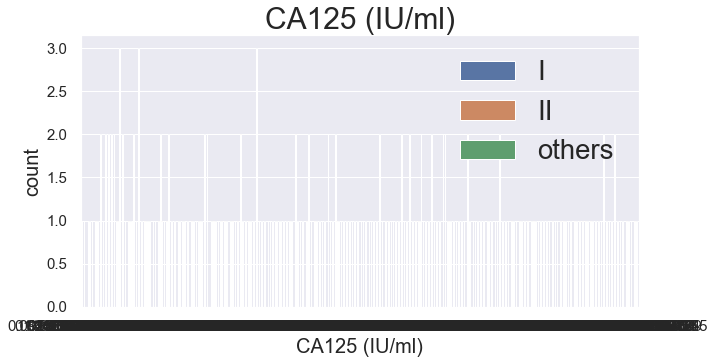

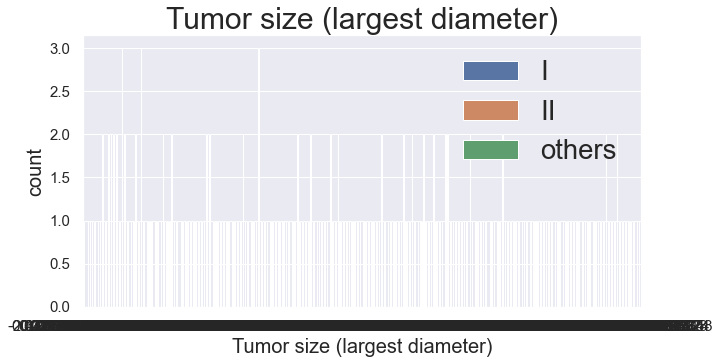

In [44]:
for i in Numerical:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=i, data=data, hue=label_data['Grade'])
    plt.legend(['I', 'II', 'others'])
    plt.title(i)
    plt.show()

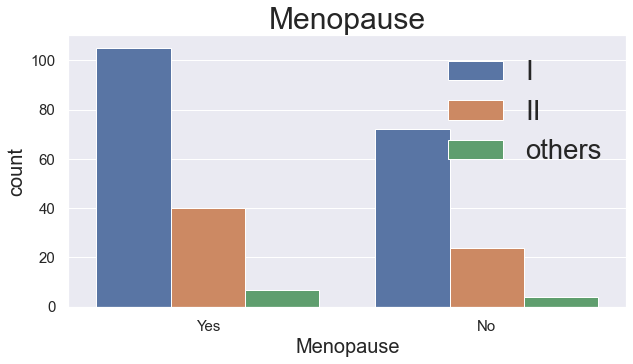

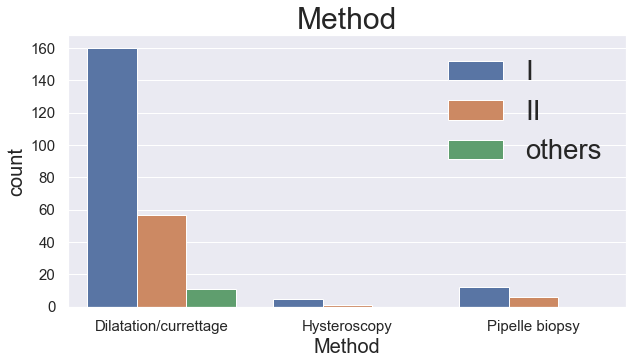

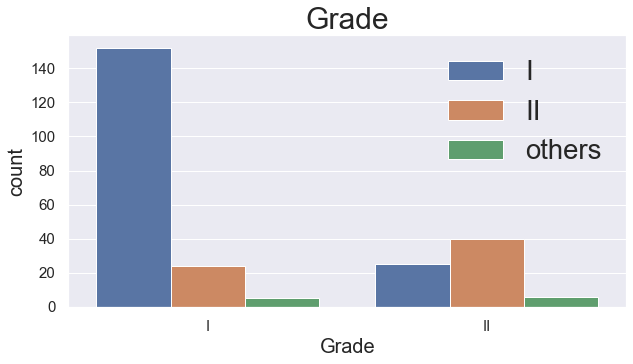

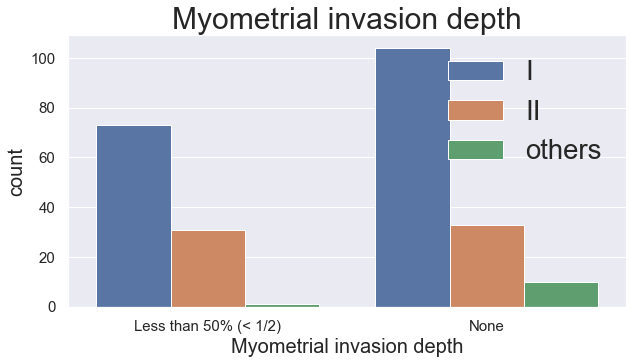

In [45]:
for i in Categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=i, data=data, hue=label_data['Grade'])
    plt.legend(['I', 'II', 'others'])
    plt.title(i)
    plt.show()

* 수치형, 범주형에 대한 label_data의 Grade의 분포도를 확인했다.
* Preoperative의 Grade와 침습깊이에 따른 label_data의 Grade의 분포도를 봄. (크게 연관성이 있어보이지는 않음.)

# violin을 이용한 label_Grade, Age, Menopause에 따른 관계 확인

In [46]:
import plotly.express as px

fig = px.violin(data, y='Age', x=label_Grade, color='Menopause', box=True, points="all")
fig.show()

* 폐경여부는 없는 경우가 있는 경우에 비해 좀 더 어린 것으로 보임.
* Grade I에 폐경이 없는 경우에 outlier 존재.
* 폐경 여부와 Age에 따른 것이 Grade에 특별한 것은 보이지 않음.

# violin을 이용한 label_Grade, CA125, Menopause에 따른 관계 확인

In [47]:
import plotly.express as px

fig = px.violin(data, y='CA125 (IU/ml)', x=label_Grade, color='Menopause', box=True, points="all")
fig.show()

* 폐경 여부에 따른 CA125는 큰 변화는 안보임.
* 뭔가 Grade I, II는 중앙 값이 비슷한데. others만 중앙 값이 좀 더 밑에 있는 것을 확인할 수 있음.

# violin을 이용한 label_Grade, Tumor size, Menopause에 따른 관계 확인

In [48]:
import plotly.express as px

fig = px.violin(data, y='Tumor size (largest diameter)', x=label_Grade, color='Menopause', box=True, points="all")
fig.show()

* Grade I에 큰 outlier가 1개 존재.
* 종양크기도 Grade I, II은 중앙값이 비슷하게 있는데, others에는 살짝 좀 더 밑에 있는 것을 알 수 있음.

# 결측치 확인

In [49]:
# pd.isna(data).sum()

In [50]:
# data.describe()

In [51]:
# # 중간 값인 21로 우선 처리.
# data = data.fillna(21)
# pd.isna(data).sum()

* CA125에 결측치가 1개가 있었는데, 중간 값인 21로 우선 처리함.

# 데이터 전처리

In [52]:
# 일단은 수치형에 LabelEncoder. (나중에 따로 수치형은 정규화 해보기. - 수치형만 StadnardScaler를 해도 결과는 똑같음)
# select numerical features and encoding it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])# apply label encoding
# apply label encoding
numerical_features = numerical_features.apply(LabelEncoder().fit_transform)
numerical_features.head()

Age  CA125 (IU/ml)  Tumor size (largest diameter)
0   24             95                             95
1   25            140                            140
2   15            193                            193
3   32             87                             87
4   25             44                             44

In [53]:
# # 수치형 변수 스케일링
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # select numerical features
# data[num_columns] = scaler.fit_transform(data[num_columns])
# data[num_columns]

In [54]:
# One-Hot encoding the categorical features using get_dummies()
# select categorical features
categorical_features = data.select_dtypes(include=['object'])
# apply get_dummies encoding
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

Menopause_No  Menopause_Yes  Method_Dilatation/currettage  \
0             0              1                             1   
1             0              1                             1   
2             1              0                             1   
3             0              1                             1   
4             0              1                             1   

   Method_Hysteroscopy  Method_Pipelle biopsy  Grade_I  Grade_II  \
0                    0                      0        1         0   
1                    0                      0        1         0   
2                    0                      0        1         0   
3                    0                      0        1         0   
4                    0                      0        1         0   

   Myometrial invasion depth_Less than 50% (< 1/2)  \
0                                                1   
1                                                0   
2                                                1   
3                                                1   
4                                                1   

   Myometrial invasion depth_None  
0                               0  
1                               1  
2                               0  
3                               0  
4                               0

In [55]:
combined = pd.concat([data[num_columns], categorical_features], axis=1)
combined.head()

Age  CA125 (IU/ml)  Tumor size (largest diameter)  Menopause_No  \
0   54       2.704042                       0.994748             0   
1   55       3.014554                       1.103452             0   
2   45       3.772071                       1.327624             1   
3   62       2.626840                       0.965782             0   
4   55       2.199444                       0.788205             0   

   Menopause_Yes  Method_Dilatation/currettage  Method_Hysteroscopy  \
0              1                             1                    0   
1              1                             1                    0   
2              0                             1                    0   
3              1                             1                    0   
4              1                             1                    0   

   Method_Pipelle biopsy  Grade_I  Grade_II  \
0                      0        1         0   
1                      0        1         0   
2                      0        1         0   
3                      0        1         0   
4                      0        1         0   

   Myometrial invasion depth_Less than 50% (< 1/2)  \
0                                                1   
1                                                0   
2                                                1   
3                                                1   
4                                                1   

   Myometrial invasion depth_None  
0                               0  
1                               1  
2                               0  
3                               0  
4                               0

In [56]:
# seperate features and target
X = combined
y = label_data['Grade']

In [57]:
from sklearn.preprocessing import LabelEncoder
# 라벨 y에 LabelEncoder 적용
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [58]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [59]:
# ValueError: feature_names may not contain [, ] or < xgboost 에러 해결
# [, ] or <가 포함되지 않아야 한다고함.
import re
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [60]:
#!pip install imbalanced-learn==0.6.0
#!pip install scikit-learn==0.22.1

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# oversampling 기법 적용

In [62]:
# imbalanced-learn 패키지
#from imblearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
#smote = SMOTE(random_state=11)
#X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [63]:
# from imblearn.over_sampling import RandomOverSampler 
# ros = RandomOverSampler(random_state=42)

# X_train, y_train = ros.fit_resample(X_train, y_train)

# Model 1: XGBoost

In [64]:
# model building xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# XGBoost 분류기 생성
xgb_clf = XGBClassifier(n_estimators=10)

# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]

# 초모수 격자 생성
xgb_param_grid = {'max_depth': list(range(2, 10)),
                 'subsample': np.linspace(0.4, 1, 7),
                 'scale_pos_weight': weights,}

# create a random search object

xgb_random = RandomizedSearchCV(estimator = xgb_clf,
                               param_distributions = xgb_param_grid,
                               n_iter = 20, # 파라미터 검색 횟수
                               scoring = 'f1_macro', # 평가 지표
                               n_jobs=-1, # 사용할 CPU 코어 개수(1: 기본값, -1 모든 코어 다 사용)
                               cv=3, # 교차 검증시 fold 개수
                               random_state = 42,
                               refit=True,
                               return_train_score=True)




xgb_random.fit(X_train, y_train)
# predict
y_pred = xgb_random.predict(X_test)
# accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Macro average of F1 score', f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9019607843137255
Macro average of F1 score 0.5803921568627451


In [65]:
hr_random_df = pd.DataFrame(xgb_random.cv_results_)
hr_random_df.loc[:, ['mean_test_score', "params"]]

mean_test_score                                             params
0          0.374972  {'subsample': 0.8999999999999999, 'scale_pos_w...
1          0.433927  {'subsample': 0.6, 'scale_pos_weight': 25, 'ma...
2          0.394253  {'subsample': 0.8999999999999999, 'scale_pos_w...
3          0.428530  {'subsample': 0.7, 'scale_pos_weight': 10, 'ma...
4          0.367225  {'subsample': 0.4, 'scale_pos_weight': 25, 'ma...
5          0.427544  {'subsample': 0.6, 'scale_pos_weight': 75, 'ma...
6          0.412865  {'subsample': 0.7, 'scale_pos_weight': 50, 'ma...
7          0.438880  {'subsample': 0.6, 'scale_pos_weight': 50, 'ma...
8          0.371262  {'subsample': 0.4, 'scale_pos_weight': 25, 'ma...
9          0.364247  {'subsample': 1.0, 'scale_pos_weight': 25, 'ma...
10         0.426253  {'subsample': 1.0, 'scale_pos_weight': 1000, '...
11         0.373140  {'subsample': 0.5, 'scale_pos_weight': 99, 'ma...
12         0.372506  {'subsample': 0.8999999999999999, 'scale_pos_w...
13         0.413371  {'subsample': 0.8, 'scale_pos_weight': 75, 'ma...
14         0.420317  {'subsample': 0.6, 'scale_pos_weight': 1, 'max...
15         0.364247  {'subsample': 1.0, 'scale_pos_weight': 10, 'ma...
16         0.370717  {'subsample': 0.8999999999999999, 'scale_pos_w...
17         0.377296  {'subsample': 0.4, 'scale_pos_weight': 50, 'ma...
18         0.425763  {'subsample': 0.7, 'scale_pos_weight': 50, 'ma...
19         0.367225  {'subsample': 0.4, 'scale_pos_weight': 50, 'ma...

In [66]:
xgb_random.best_estimator_ 

XGBClassifier(n_estimators=10, objective='multi:softprob', scale_pos_weight=50,
              subsample=0.6)

In [67]:
# # Finding the best parameters using loop
# accuracy = []
# for i in range(10, 100):
#     xgb_random = XGBClassifier(n_estimators=i)
#     xgb_random.fit(X_train_over, y_train_over)
#     y_pred = xgb_random.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))
# # ploting accuracy graph
# plt.plot(range(10, 100), accuracy)
# plt.ylabel('Accuracy')
# plt.xlabel('Range')
# plt.show()

In [68]:
# print precision, recall, f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.67      0.80         9
           2       0.00      0.00      0.00         2

    accuracy                           0.90        51
   macro avg       0.63      0.56      0.58        51
weighted avg       0.87      0.90      0.88        51



* 0 : I,         1: II,           2: others

[Text(0, 0.5, 'I'), Text(0, 1.5, 'II'), Text(0, 2.5, 'others')]

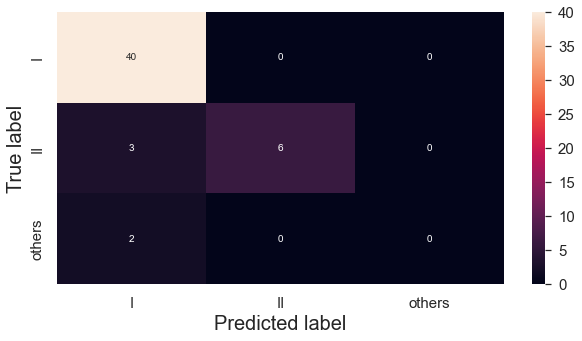

In [69]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
ax = sns.heatmap(cm, annot=True)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['I', 'II', 'others'])
ax.yaxis.set_ticklabels(['I', 'II', 'others'])
# 세로 축이 True label
# 가로 축이 Predicted label

* Grade I이라고 예측한 것이 Others라고 되는 것이 2개 존재.

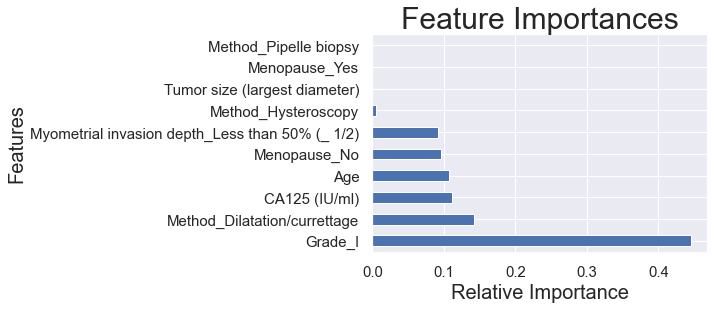

In [70]:
# Feature importance for xgboost
feat_importances = pd.Series(xgb_random.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# SHAP

* 참고: https://muzukphysics.tistory.com/entry/XAI-SHAP-%ED%95%B4%EC%84%9D-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%98%88%EC%A0%9C
* https://data-newbie.tistory.com/254

In [71]:
import shap

model = xgb_random.best_estimator_

shap.initjs()
# Create the explainer object
explainer = shap.TreeExplainer(model)
print('Expected Value:', explainer.expected_value)
# get the shap values from the explainer
shap_values = explainer.shap_values(X_test)

Expected Value: [ 1.01750237  0.40935561 -0.02614841]


In [72]:
label_data.head()

Route Stage Histologic diagnosis Grade Myometrial invasion depth  \
0  Laparoscopic    Ia         Endometrioid     I             Less than 50%   
1  Laparoscopic    Ia         Endometrioid     I             Less than 50%   
2  Laparoscopic    Ia         Endometrioid     I             Less than 50%   
3  Laparoscopic    Ia         Endometrioid     I             Less than 50%   
4  Laparoscopic    Ia         Endometrioid     I             Less than 50%   

   Tumor size (largest diameter) Extrauterine involvement  \
0                            2.5                     none   
1                            1.0                     none   
2                            3.8                     none   
3                            4.0                     none   
4                            2.0                     none   

  Lymphovascular space invasion (LVSI) Metastasis of pelvic lymph node  \
0                                   No                               0   
1                                   No                               0   
2                                   No                               0   
3                                   No                               0   
4                                   No                               0   

   Metastasis of para-aortic lymph node LN metastasis  
0                                     0            no  
1                                     0            no  
2                                     0            no  
3                                     0            no  
4                                     0            no

# force plots. 
-Red arrows는 예측값을 더 높게하는 변수들의 여향도를 설명 (SHAP values) <br>
-Blue arrows는 반대로 지금 예측 값을 더 낮게하는 변수들의 영향도를 나타냄. <br>
#### 각각의 arrows의 크기는 변수의 영향도에 대한 양을 나타낸다.<br><br>

여기서 base value는 train set에서의 모델 평균 예측을 마킹한 것. <br>
output value는 모델의 예측이다. 가장 큰 영향을 준 변의 값은 아래에 표시가 된다. <br>
결국 forceplot은 예측에 대한 효과적인 요약을 제공한다.<br>

## 개별적으로 확인. 
###  target = 0 , idx = 4 (idx = 4번째이고 Grade I을 예측하는데 미치는 영향 확인)

In [73]:
# https://data-newbie.tistory.com/254
shap.force_plot(explainer.expected_value[0],
               shap_values[0][4], X_test.iloc[4])

###  target = 1 , idx = 4 (idx = 4번째이고 Grade II을 예측하는데 미치는 영향 확인)
### Grade II에 미치는 영향들 확인.

In [74]:
# https://data-newbie.tistory.com/254
shap.force_plot(explainer.expected_value[1],
               shap_values[1][4], X_test.iloc[4])

###  target = 2 , idx = 4 (idx = 4번째이고 others을 예측하는데 미치는 영향 확인)

In [75]:
# https://data-newbie.tistory.com/254
shap.force_plot(explainer.expected_value[2],
               shap_values[2][4], X_test.iloc[4])

# 로컬 막대 플롯 (Grade I 예측하는 것)
# SHAP Waterfall Plot 

#### 특정 데이터가 예측된 근거를 보여주는 plot이다. 각 Feature들의 공헌도와 Shapley Value를 직관적으로 표현, 긍정적 요인은 빨간색, 부정적 요인은 파란색이다.

* 빨간색: 긍정적 요인
* 파란색: 부정적 요인

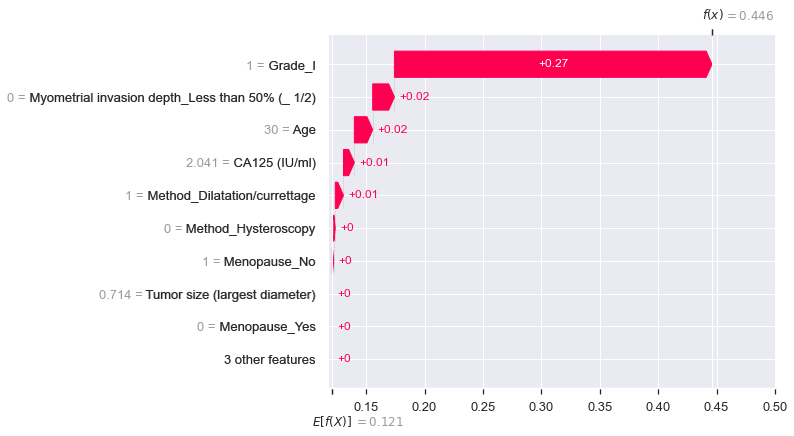

In [76]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.Independent(X_train)
def f(x):
    return shap.links.identity(model.predict_proba(x, validate_features=False)[:,0])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[4])

# 전역 막대 플롯 (Grade I 예측하는 것)

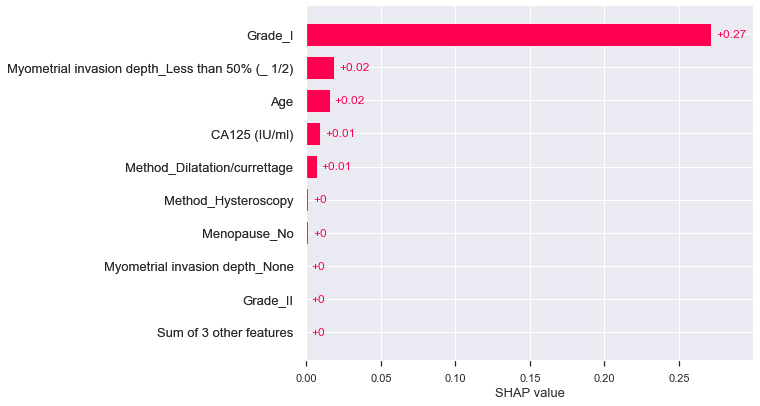

In [77]:
# plot the global importance of each feature
shap.plots.bar(shap_values[4])

# Summary
### 전체 Features들에 대해 Shapley Value가 어떠한 분포를 미치는지 시각화

* 빨간색: Feature 값 높음
* 파란색: Feature 값 낮음

### 또한, X축 0을 기준으로 음의 영역은 부정적 요인, 양의 영역은 긍정적 요인을 뜻함.
* 음의 영역: 부정적 요인
* 양의 영역: 긍정적 요인

#### 결론적으로, 양의 영역에 파란색 점이 찍혀있다면, Feature가 적을 수록 긍정적으로 작용한다는 것을 의미.

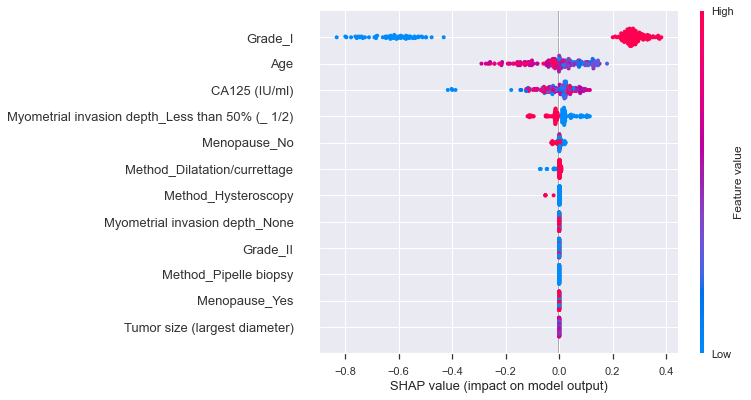

In [78]:
# plot the distribution of importances for each feature over all samples
shap.summary_plot(shap_values)

# 2. Grade II

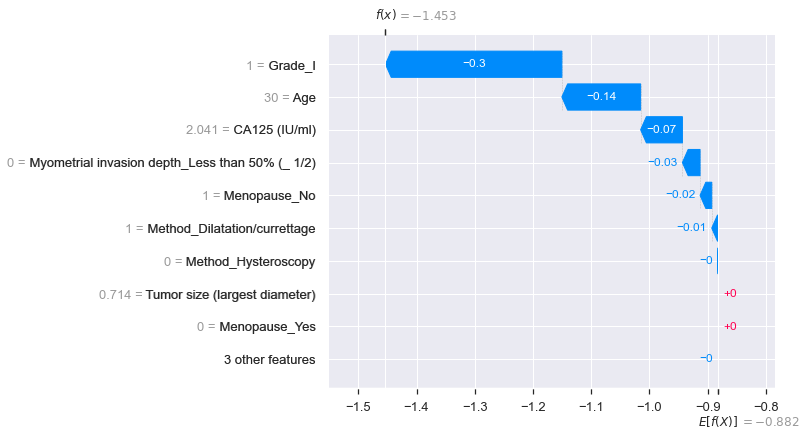

In [79]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.Independent(X_train)
def f(x):
    return shap.links.identity(model.predict_proba(x, validate_features=False)[:,1])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[4])

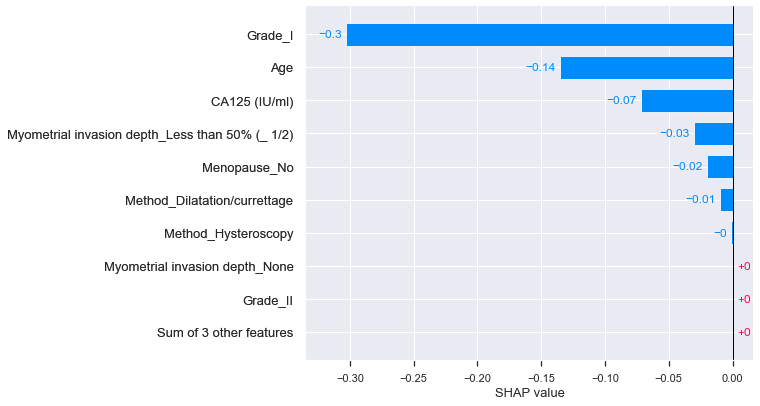

In [80]:
# 전역 막대 플롯
shap.plots.bar(shap_values[4])

# Summary
### 전체 Features들에 대해 Shapley Value가 어떠한 분포를 미치는지 시각화

* 빨간색: Feature 값 높음
* 파란색: Feature 값 낮음

### 또한, X축 0을 기준으로 음의 영역은 부정적 요인, 양의 영역은 긍정적 요인을 뜻함.
* 음의 영역: 부정적 요인
* 양의 영역: 긍정적 요인

#### 결론적으로, 양의 영역에 파란색 점이 찍혀있다면, Feature가 적을 수록 긍정적으로 작용한다는 것을 의미.

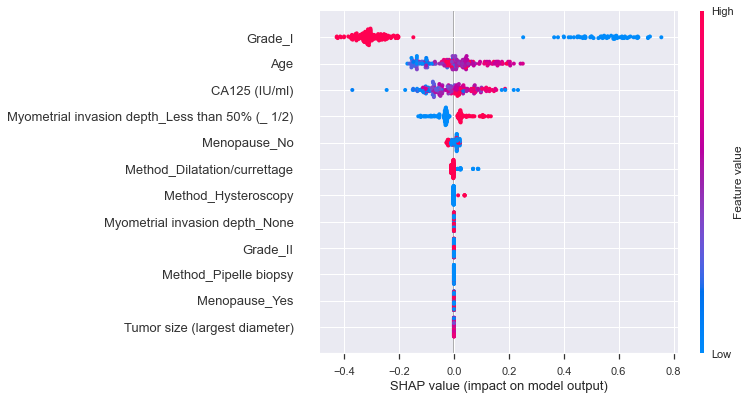

In [81]:
# plot the distribution of importances for each feature over all samples
shap.summary_plot(shap_values)

# others

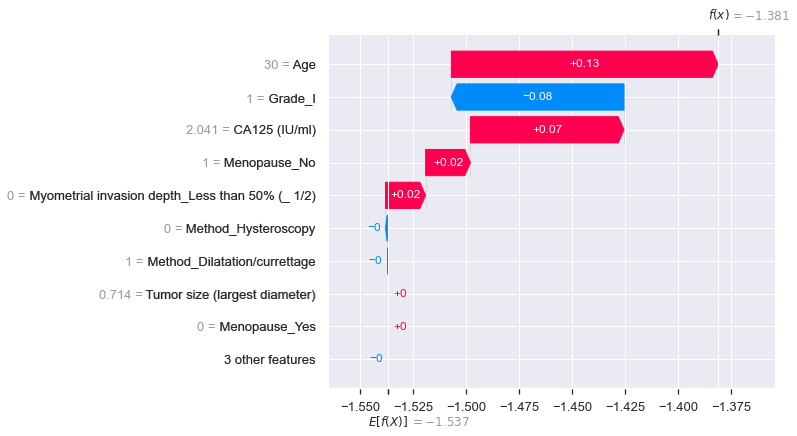

In [82]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.Independent(X_train)
def f(x):
    return shap.links.identity(model.predict_proba(x, validate_features=False)[:,2])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[4])

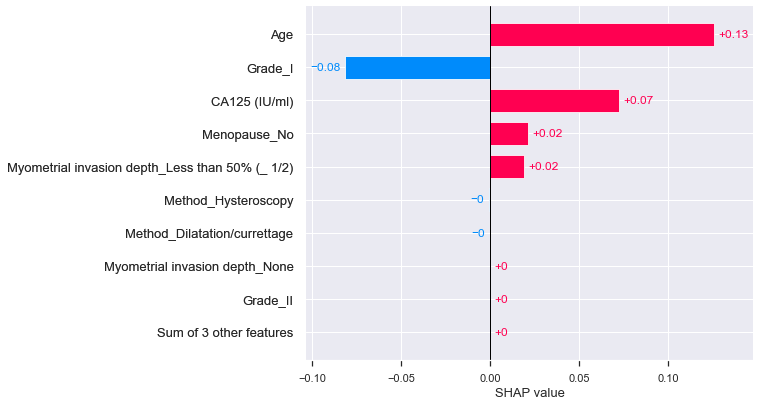

In [83]:
# plot the global importance of each feature
shap.plots.bar(shap_values[4])

# Summary
### 전체 Features들에 대해 Shapley Value가 어떠한 분포를 미치는지 시각화

* 빨간색: Feature 값 높음
* 파란색: Feature 값 낮음

### 또한, X축 0을 기준으로 음의 영역은 부정적 요인, 양의 영역은 긍정적 요인을 뜻함.
* 음의 영역: 부정적 요인
* 양의 영역: 긍정적 요인

#### 결론적으로, 양의 영역에 파란색 점이 찍혀있다면, Feature가 적을 수록 긍정적으로 작용한다는 것을 의미.

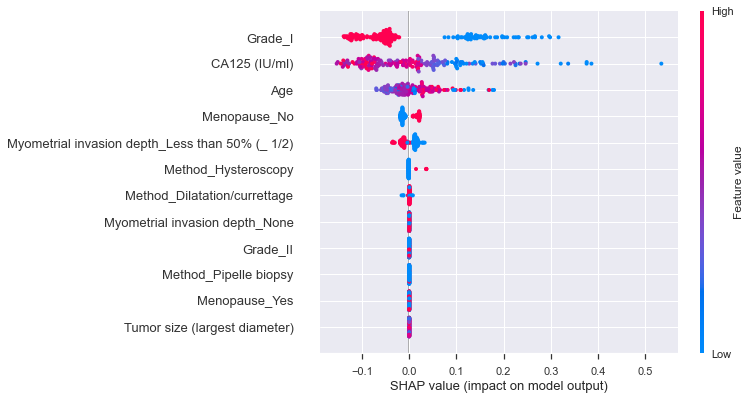

In [84]:
# plot the distribution of importances for each feature over all samples
shap.summary_plot(shap_values)

In [85]:
asdasd

NameError: name 'asdasd' is not defined

# Model 2 : Cat boost

In [ ]:
# model building catboost
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=107)
model2.fit(X_train, y_train)
# predict
y_pred = model2.predict(X_test)
# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Macro average of F1 score', f1_score(y_test, y_pred, average='macro'))
# print classification report
from sklearn.metrics import classification_report
print('Classification report\n',classification_report(y_test, y_pred))

In [ ]:
# iteration parameter를 100~115로 해서 가장 높은 것을 찾음.
# Simple parameter tuning using loop
accuracy = []
for i in range(40, 80):
    model2 = CatBoostClassifier(iterations=i)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
#ploting accuract graph
plt.plot(range(40, 80), accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Range')
plt.show()

In [ ]:
# model building catboost
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=67)
model2.fit(X_train, y_train)
# predict
y_pred = model2.predict(X_test)
# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Macro average of F1 score', f1_score(y_test, y_pred, average='macro'))
# print classification report
from sklearn.metrics import classification_report
print('Classification report\n',classification_report(y_test, y_pred))

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
ax = sns.heatmap(cm, annot=True)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['I', 'II', 'others'])
ax.yaxis.set_ticklabels(['I', 'II', 'others'])
# 세로 축이 True label
# 가로 축이 Predicted label

In [ ]:
# Feature importance for xgboost
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importances')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()